# *<font color='#0042ab'><b>Baigiamasis darbas:  Pasaulio šalių laimės balų analizė</b></font>*

## *<font color='#011efe'>Turinys</font>*

1. [Duomenų rinkinys ir darbo tikslas](#tikslas)
2. [Duomenų importas](#duomenys)
3. [Duomenų aprašymas](#duomenu_apr)
4. [Aprašomoji statistika](#analizė)
5. [Koreliacija](#koreliacija)
6. [Modelio taikymas](#taikymas)
7. [Išvados](#Išvados)

 ## *<font color='#011efe'>1. Duomenų rinkinys ir darbo tikslas</font>*<a id='tikslas'></a> 

 ## *<font color='#011efe'>2. Duomenų importas</font>*<a id='duomenų_importas'></a>

In [1]:
# Import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
data2015 = pd.read_excel('data\\World Happiness Report2015.xlsx', sep=';')
data2016 = pd.read_excel('data\\World Happiness Report2016.xlsx', sep=';')
data2017= pd.read_excel('data\\World Happiness Report2017.xlsx', sep=';')
data2018= pd.read_excel('data\\World Happiness Report2018.xlsx', sep=';')
data= pd.read_excel('data\\World Happiness Reportbendras.xlsx', sep=';')
data_b = pd.read_excel('data\\baltijos.xlsx', sep=';')

 ## *<font color='#011efe'>3. Duomenų aprašymas</font>*<a id='duomenu_apr'></a> 

In [3]:
data2015.shape # tikriname kiek yra stulpelių bei eilučių

(158, 11)

In [4]:
data2016.shape

(157, 11)

In [5]:
data2017.shape

(154, 11)

In [6]:
data2018.shape

(156, 11)

In [7]:
data2015.info() # lentelės informacija

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
Šalis                 158 non-null object
Laimės_reitingas      158 non-null int64
Laimės_balas          158 non-null float64
Ekonomikos_lygis      158 non-null float64
Socialinė_parama      158 non-null float64
Gyvenimo_trukmė       158 non-null float64
Pasirinkimo_laisvė    158 non-null float64
Korupcijos_lygis      158 non-null float64
Dosnumas              158 non-null float64
Distopija             158 non-null float64
Regionas              158 non-null object
dtypes: float64(8), int64(1), object(2)
memory usage: 13.7+ KB


In [8]:
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 11 columns):
Šalis                 157 non-null object
Laimės_reitingas      157 non-null int64
Laimės_balas          157 non-null float64
Ekonomikos_lygis      157 non-null float64
Socialinė_parama      157 non-null float64
Gyvenimo_trukmė       157 non-null float64
Pasirinkimo_laisvė    157 non-null float64
Korupcijos_lygis      157 non-null float64
Dosnumas              157 non-null float64
Distopija             157 non-null float64
Regionas              157 non-null object
dtypes: float64(8), int64(1), object(2)
memory usage: 13.6+ KB


In [9]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 11 columns):
Šalis                 154 non-null object
Laimės_reitingas      154 non-null int64
Laimės_balas          154 non-null float64
Ekonomikos_lygis      154 non-null float64
Socialinė_parama      154 non-null float64
Gyvenimo_trukmė       154 non-null float64
Pasirinkimo_laisvė    154 non-null float64
Dosnumas              154 non-null float64
Korupcijos_lygis      154 non-null float64
Distopija             154 non-null float64
Regionas              154 non-null object
dtypes: float64(8), int64(1), object(2)
memory usage: 13.3+ KB


In [10]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Šalis                 156 non-null object
Laimės_reitingas      156 non-null int64
Laimės_balas          156 non-null float64
Ekonomikos_lygis      156 non-null float64
Socialinė_parama      156 non-null float64
Gyvenimo_trukmė       156 non-null float64
Pasirinkimo_laisvė    156 non-null float64
Dosnumas              156 non-null float64
Korupcijos_lygis      156 non-null float64
Distopija             156 non-null float64
Regionas              156 non-null object
dtypes: float64(8), int64(1), object(2)
memory usage: 13.5+ KB


In [11]:
data.isnull().sum() # tikriname yra visi duomenys yra

Šalis                 0
Regionas              0
Metai                 0
Laimės_reitingas      0
Laimės_balas          0
Ekonomikos_lygis      0
Socialinė_parama      0
Gyvenimo_trukmė       0
Pasirinkimo_laisvė    0
Korupcijos_lygis      0
Dosnumas              0
Distopija             0
dtype: int64

In [12]:
data.count()/len(data)*100

Šalis                 100.0
Regionas              100.0
Metai                 100.0
Laimės_reitingas      100.0
Laimės_balas          100.0
Ekonomikos_lygis      100.0
Socialinė_parama      100.0
Gyvenimo_trukmė       100.0
Pasirinkimo_laisvė    100.0
Korupcijos_lygis      100.0
Dosnumas              100.0
Distopija             100.0
dtype: float64

In [95]:
data.head()

,Šalis,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Dosnumas,Korupcijos_lygis,Distopija,Regionas
Šalis,,,,,,,,,,,
Finland,Finland,1,7.632,1.305,1.592,0.874,0.681,0.192,0.393,2.988,Western Europe
Norway,Norway,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.723,Western Europe
Denmark,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.779,Western Europe
Iceland,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.564,Western Europe
Switzerland,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.675,Western Europe


## *<font color='#011efe'>4. Aprašomoji statistika</font>*<a id='analizė'></a> 

In [13]:
data2015.describe() # visų parametrų išklotinė

,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Korupcijos_lygis,Dosnumas,Distopija
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.382063,0.868495,0.999097,0.630259,0.428615,0.143422,0.237296,2.068982
std,45.754363,1.151008,0.507687,0.288241,0.247078,0.150693,0.120034,0.126685,0.574809
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.738325
50%,79.500000,5.232500,0.910245,1.033960,0.696705,0.435515,0.107220,0.216130,2.087970
75%,118.750000,6.288500,1.158448,1.218783,0.811013,0.549092,0.180255,0.309882,2.448193
max,158.000000,7.587000,4.740000,1.890000,1.025250,0.669730,0.551910,0.795880,3.602140


In [14]:
data2016.describe()

,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Korupcijos_lygis,Dosnumas,Distopija
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,79.000000,5.382185,0.958105,0.793621,0.557619,0.370994,0.137624,0.242635,2.323101
std,45.466105,1.141674,0.420127,0.266706,0.229349,0.145507,0.111038,0.133756,0.555818
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.020000
50%,79.000000,5.314000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,1.279730,1.021520,0.729930,0.484530,0.175540,0.311850,2.684130
max,157.000000,7.526000,1.920000,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [15]:
data2017.describe()

,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Dosnumas,Korupcijos_lygis,Distopija
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,77.500000,5.347084,0.981801,1.187626,0.549766,0.409096,0.246809,0.123503,1.848442
std,44.600075,1.131610,0.420593,0.287762,0.237030,0.150440,0.135216,0.101878,0.501160
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.250000,4.501250,0.661444,1.042312,0.367188,0.302209,0.153590,0.057170,1.587952
50%,77.500000,5.276000,1.059638,1.252872,0.605316,0.438880,0.231521,0.089914,1.829808
75%,115.750000,6.095250,1.315027,1.415360,0.717596,0.517596,0.324529,0.153411,2.147727
max,154.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [16]:
data2018.describe()

,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Dosnumas,Korupcijos_lygis,Distopija
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.180942,0.113362,2.036356
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098460,0.097673,0.520600
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.383000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000,1.760250
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000,2.017500
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.139000,2.423500
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000,3.243000


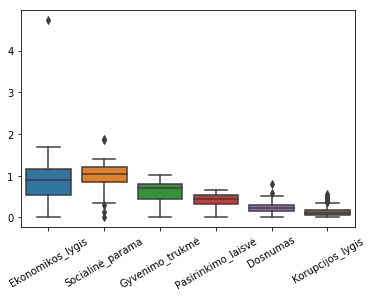

In [17]:
ax = sns.boxplot(data=data2015[['Ekonomikos_lygis','Socialinė_parama', 'Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis']])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

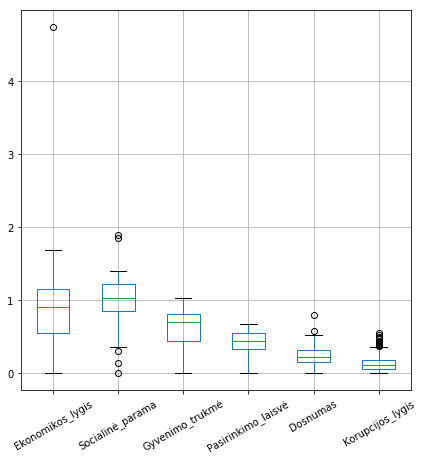

In [18]:
ax = data2015[['Ekonomikos_lygis', 
          'Socialinė_parama',
          'Gyvenimo_trukmė', 
          'Pasirinkimo_laisvė', 
          'Dosnumas', 
          'Korupcijos_lygis']].boxplot(figsize= (7,7))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

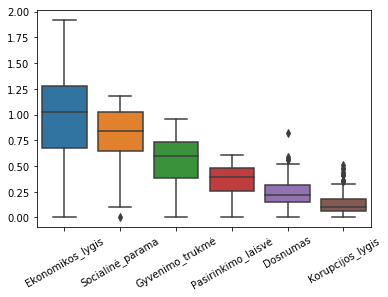

In [19]:
ax = sns.boxplot(data=data2016[['Ekonomikos_lygis','Socialinė_parama', 'Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis']])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

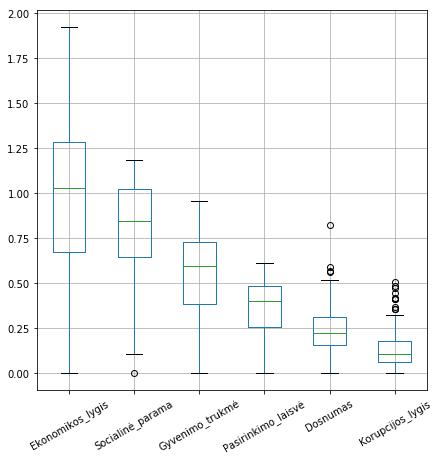

In [20]:
ax = data2016[['Ekonomikos_lygis', 
          'Socialinė_parama',
          'Gyvenimo_trukmė', 
          'Pasirinkimo_laisvė', 
          'Dosnumas', 
          'Korupcijos_lygis']].boxplot(figsize= (7,7))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

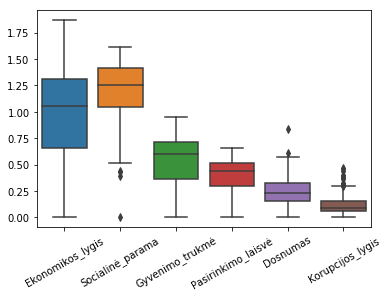

In [21]:
ax = sns.boxplot(data=data2017[['Ekonomikos_lygis','Socialinė_parama', 'Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis']])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

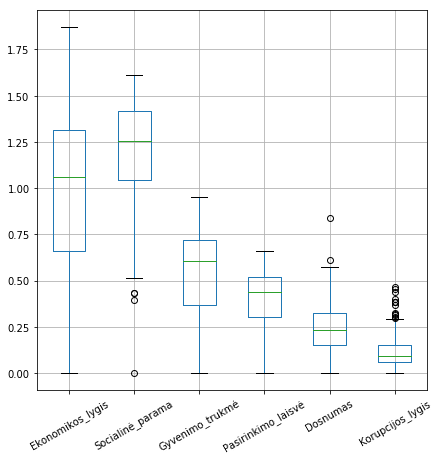

In [22]:
ax = data2017[['Ekonomikos_lygis', 
          'Socialinė_parama',
          'Gyvenimo_trukmė', 
          'Pasirinkimo_laisvė', 
          'Dosnumas', 
          'Korupcijos_lygis']].boxplot(figsize= (7,7))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

# *<font color='#0fb9f5'>Išskirtys</font>*

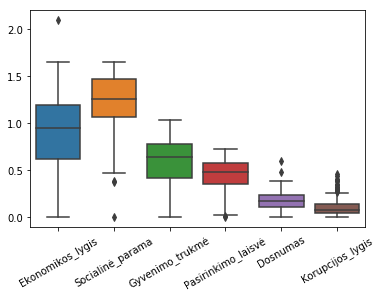

In [23]:
ax = sns.boxplot(data=data2018[['Ekonomikos_lygis','Socialinė_parama', 'Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis']])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

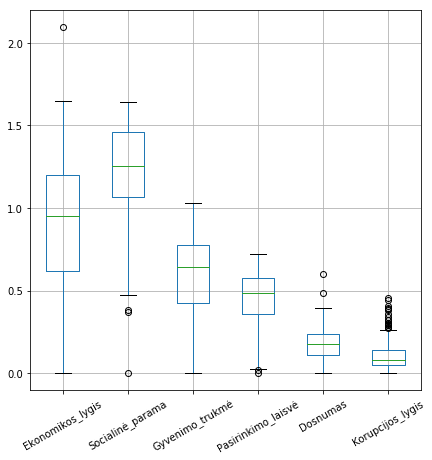

In [24]:
ax = data2018[['Ekonomikos_lygis', 
          'Socialinė_parama',
          'Gyvenimo_trukmė', 
          'Pasirinkimo_laisvė', 
          'Dosnumas', 
          'Korupcijos_lygis']].boxplot(figsize= (7,7))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

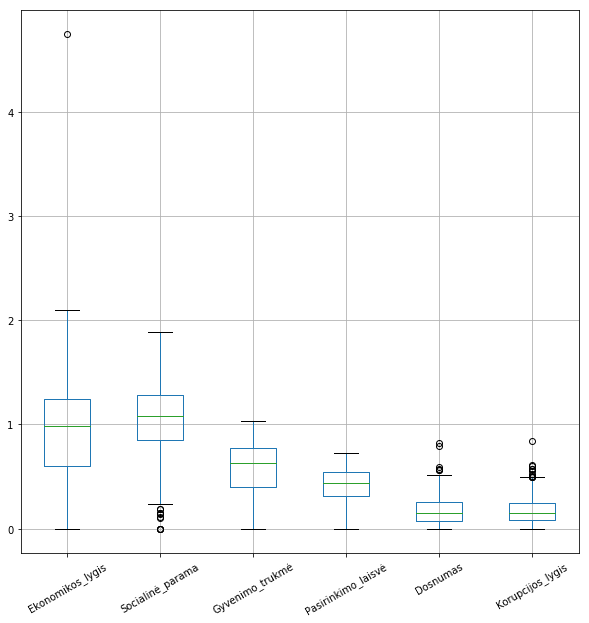

In [25]:
ax = data[['Ekonomikos_lygis', 
          'Socialinė_parama',
          'Gyvenimo_trukmė', 
          'Pasirinkimo_laisvė', 
          'Dosnumas', 
          'Korupcijos_lygis']].boxplot(figsize= (10,10))

ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

In [26]:
q25 = data['Ekonomikos_lygis'].quantile(.25)
q75 = data['Ekonomikos_lygis'].quantile(.75)
iqr = q75 - q25

salyga1 = data['Ekonomikos_lygis'] < (q25 - 1.5 * iqr)
salyga2 = data['Ekonomikos_lygis'] > (q75 + 1.5 * iqr)
data[salyga1 | salyga2] 

,Šalis,Regionas,Metai,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Korupcijos_lygis,Dosnumas,Distopija
36,Malta,Western Europe,2015,37,6.302,4.74,1.30203,0.88721,0.60365,0.13586,0.51752,1.88


In [27]:
q25 = data['Socialinė_parama'].quantile(.25)
q75 = data['Socialinė_parama'].quantile(.75)
iqr = q75 - q25

salyga1 = data['Socialinė_parama'] < (q25 - 1.5 * iqr)
salyga2 = data['Socialinė_parama'] > (q75 + 1.5 * iqr)
data[salyga1 | salyga2] 

,Šalis,Regionas,Metai,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Korupcijos_lygis,Dosnumas,Distopija
147,Central African Republic,Africa,2015,148,3.678,0.07850,0.00000,0.066990,0.488790,0.082890,0.238350,1.000000
157,Togo,Africa,2015,158,2.839,0.20868,0.13995,0.284430,0.364530,0.107310,0.166810,1.567260
283,Georgia,Central and Eastern Europe,2016,126,4.252,0.83792,0.19249,0.640350,0.324610,0.318800,0.067860,1.870310
289,Malawi,Africa,2016,132,4.156,0.08709,0.14700,0.293640,0.414300,0.075640,0.309680,2.828590
300,South Sudan,Africa,2016,143,3.832,0.39394,0.18519,0.157810,0.196620,0.130150,0.258990,2.509290
310,Benin,Africa,2016,153,3.484,0.39499,0.10419,0.210280,0.397470,0.066810,0.201800,2.108120
311,Afghanistan,Asia-Pacific,2016,154,3.360,0.38227,0.11037,0.173440,0.164300,0.071120,0.312680,2.145580
312,Togo,Africa,2016,155,3.303,0.28123,0.00000,0.248110,0.346780,0.115870,0.175170,2.135400
313,Syria,Africa,2016,156,3.069,0.74719,0.14866,0.629940,0.069120,0.172330,0.483970,0.817890
468,Central African Republic,Africa,2017,154,2.693,0.00000,0.00000,0.018773,0.270842,0.280876,0.056565,2.066005


In [28]:
q25 = data['Dosnumas'].quantile(.25)
q75 = data['Dosnumas'].quantile(.75)
iqr = q75 - q25

salyga1 = data['Dosnumas'] < (q25 - 1.5 * iqr)
salyga2 = data['Dosnumas'] > (q75 + 1.5 * iqr) 
data[salyga1 | salyga2] 

,Šalis,Regionas,Metai,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Korupcijos_lygis,Dosnumas,Distopija
33,Thailand,Asia-Pacific,2015,34,6.455,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
128,Myanmar,Asia-Pacific,2015,129,4.307,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805
187,Malta,Western Europe,2016,30,6.488,1.30782,1.09879,0.80315,0.54994,0.17554,0.56237,1.99032
190,Thailand,Asia-Pacific,2016,33,6.474,1.08930,1.04477,0.64915,0.49553,0.02833,0.58696,2.96000
236,Indonesia,Asia-Pacific,2016,79,5.314,0.95104,0.87625,0.49374,0.39237,0.00322,0.56521,2.03171
276,Myanmar,Asia-Pacific,2016,119,4.395,0.34112,0.69981,0.39880,0.42692,0.20243,0.81971,1.50655


In [29]:
q25 = data['Korupcijos_lygis'].quantile(.25)
q75 = data['Korupcijos_lygis'].quantile(.75)
iqr = q75 - q25

salyga1 = data['Korupcijos_lygis'] < (q25 - 1.5 * iqr)
salyga2 = data['Korupcijos_lygis'] > (q75 + 1.5 * iqr) 
data[salyga1 | salyga2] 

,Šalis,Regionas,Metai,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Korupcijos_lygis,Dosnumas,Distopija
27,Qatar,Africa,2015,28,6.611,1.690420,1.078600,0.797330,0.640400,0.522080,0.325730,1.556740
153,Rwanda,Africa,2015,154,3.465,0.222080,0.773700,0.428640,0.592010,0.551910,0.226280,0.670420
309,Rwanda,Africa,2016,152,3.515,0.328460,0.615860,0.318650,0.543200,0.505210,0.235520,0.968190
322,New Zealand,Australia and New Zealand,2017,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
333,United Kingdom,Western Europe,2017,19,6.714,1.441634,1.496460,0.805336,0.508190,0.492774,0.265428,1.704144
341,Malta,Western Europe,2017,27,6.527,1.343280,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863
346,Thailand,Asia-Pacific,2017,32,6.424,1.127869,1.425792,0.647239,0.580201,0.572123,0.031613,2.039508
394,Indonesia,Asia-Pacific,2017,80,5.262,0.995539,1.274445,0.492346,0.443323,0.611705,0.015317,1.429477
427,Myanmar,Asia-Pacific,2017,113,4.545,0.367111,1.123236,0.397523,0.514492,0.838075,0.188816,1.115290
465,Syria,Asia-Pacific,2017,151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574


# *<font color='#0fb9f5'>10 laimingiausių šalių analizė</font>*

In [30]:
data2015.sort_values(by="Laimės_reitingas", ascending=True).head(10)

,Šalis,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Korupcijos_lygis,Dosnumas,Distopija,Regionas
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Western Europe
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Western Europe
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Western Europe
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Western Europe
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,North America
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,Western Europe
6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.57000,Western Europe
7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,Western Europe
8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,Australia and New Zealand
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,Australia and New Zealand


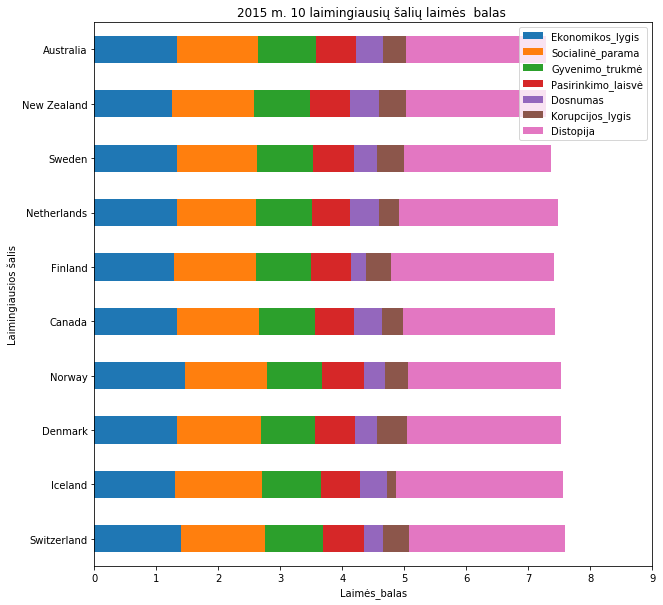

In [31]:
data2015.index = data2015['Šalis']
data2015[['Ekonomikos_lygis', 'Socialinė_parama','Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis', 'Distopija']].head(10).plot(kind='barh',
                                                                xticks=np.arange(10), stacked=True, figsize= (10, 10))
plt.xlabel("Laimės_balas")
plt.ylabel("Laimingiausios šalis")
plt.title('2015 m. 10 laimingiausių šalių laimės  balas ');

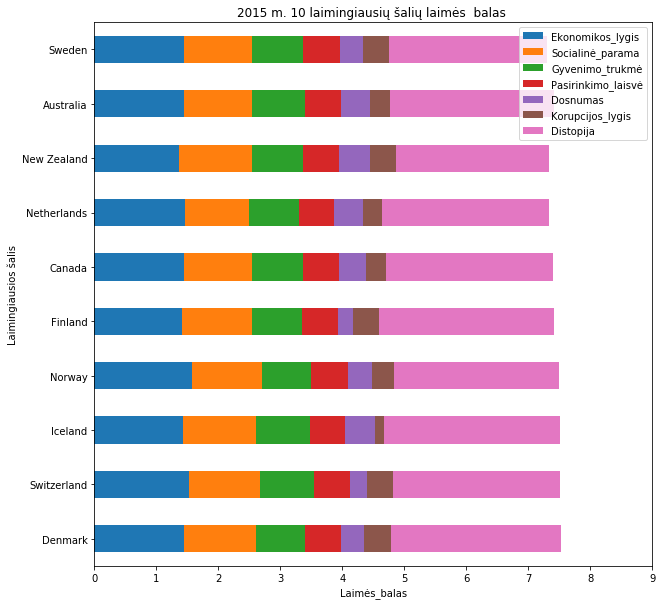

In [32]:
data2016.index = data2016['Šalis']
data2016[['Ekonomikos_lygis', 'Socialinė_parama','Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis', 'Distopija']].head(10).plot(kind='barh',
                                                                xticks=np.arange(10), stacked=True, figsize= (10, 10))
plt.xlabel("Laimės_balas")
plt.ylabel("Laimingiausios šalis")
plt.title('2015 m. 10 laimingiausių šalių laimės  balas ');

In [33]:
data2017.sort_values(by="Laimės_reitingas", ascending=True).head(10) 

,Šalis,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Dosnumas,Korupcijos_lygis,Distopija,Regionas
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe
5,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,Western Europe
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,North America
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,Australia and New Zealand
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,Western Europe
9,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,Australia and New Zealand


Text(0.5, 1.0, ' 2017 m. 10 laimingiausių šalių laimės  balas ')

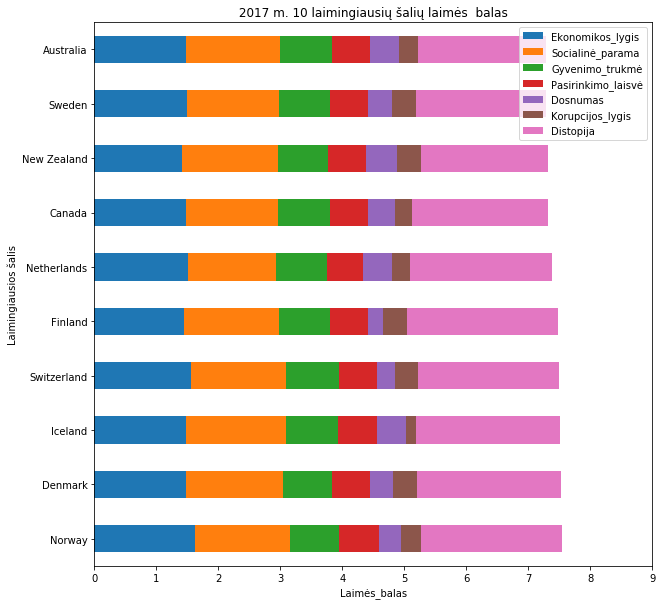

In [34]:
data2017.index = data2017['Šalis']
data2017[['Ekonomikos_lygis', 'Socialinė_parama','Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis', 'Distopija']].head(10).plot(kind='barh',
                                                                xticks=np.arange(10), stacked=True, figsize= (10, 10))
plt.xlabel("Laimės_balas")
plt.ylabel("Laimingiausios šalis")
plt.title(' 2017 m. 10 laimingiausių šalių laimės  balas ')


In [35]:
data2018.sort_values(by="Laimės_reitingas", ascending=True).head(10) 

,Šalis,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Dosnumas,Korupcijos_lygis,Distopija,Regionas
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.192,0.393,2.988,Western Europe
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.723,Western Europe
2,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.779,Western Europe
3,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.564,Western Europe
4,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.675,Western Europe
5,Netherlands,6,7.441,1.361,1.488,0.878,0.638,0.333,0.295,2.743,Western Europe
6,Canada,7,7.328,1.330,1.532,0.896,0.653,0.321,0.291,2.596,North America
7,New Zealand,8,7.324,1.268,1.601,0.876,0.669,0.365,0.389,2.545,Australia and New Zealand
8,Sweden,9,7.314,1.355,1.501,0.913,0.659,0.285,0.383,2.601,Western Europe
9,Australia,10,7.272,1.340,1.573,0.910,0.647,0.361,0.302,2.441,Australia and New Zealand


Text(0.5, 1.0, ' 2018 m. 10 laimingiausių šalių laimės  balas ')

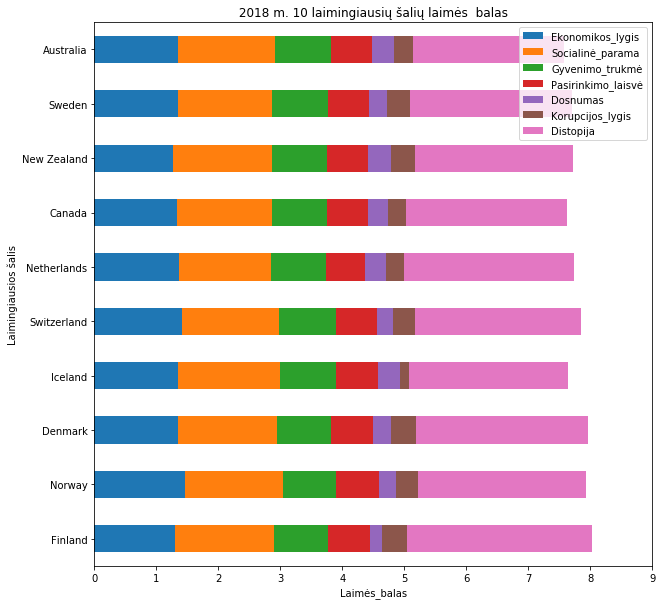

In [36]:
data2018.index = data2018['Šalis']
data2018[['Ekonomikos_lygis', 'Socialinė_parama','Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis', 'Distopija']].head(10).plot(kind='barh',
                                                                xticks=np.arange(10), stacked=True, figsize= (10, 10))
plt.xlabel("Laimės_balas")
plt.xlabel("Laimės_balas")
plt.ylabel("Laimingiausios šalis")
plt.title(' 2018 m. 10 laimingiausių šalių laimės  balas ')

# *<font color='#75ba4a'>TABLEO DASHBOARD "10 laimingiausių šalių"</font>* 

# *<font color='#0fb9f5'>10 nelaimingiausių šalių analizė</font>*

In [37]:
data2015.index = data2015['Šalis']
data2015.sort_values(by="Laimės_reitingas", ascending=True).tail(10) 

,Šalis,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Korupcijos_lygis,Dosnumas,Distopija,Regionas
Šalis,,,,,,,,,,,
Chad,Chad,149,3.667,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296,Africa
Guinea,Guinea,150,3.656,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172,Africa
Ivory Coast,Ivory Coast,151,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,Africa
Burkina Faso,Burkina Faso,152,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,Africa
Afghanistan,Afghanistan,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.00000,Asia-Pacific
Rwanda,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Africa
Benin,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Africa
Syria,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Africa
Burundi,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Africa


Text(0.5, 1.0, ' 2015 m. 10 nelaimingiausių šalių')

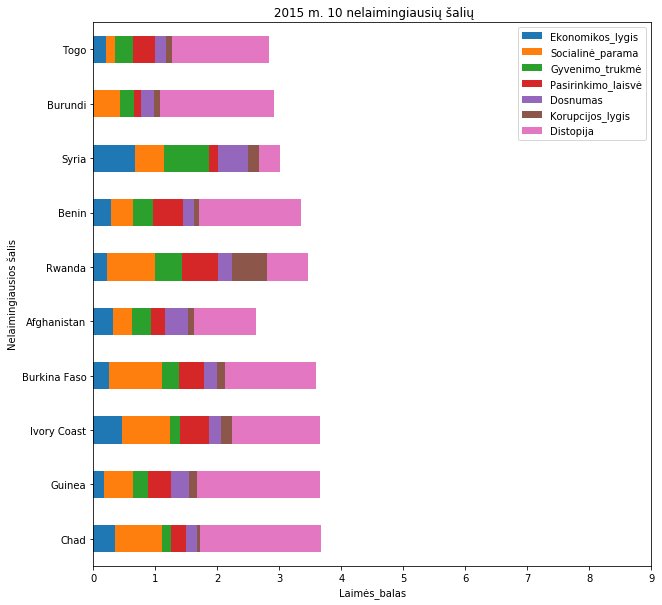

In [38]:
data2015[['Ekonomikos_lygis', 'Socialinė_parama','Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis', 'Distopija']].tail(10).plot(kind='barh',
                                                                xticks=np.arange(10), stacked=True, figsize= (10, 10))
plt.xlabel("Laimės_balas")
plt.xlabel("Laimės_balas")
plt.ylabel("Nelaimingiausios šalis")
plt.title(' 2015 m. 10 nelaimingiausių šalių')

In [39]:
data2016.sort_values(by="Laimės_reitingas", ascending=True).tail(10) 

,Šalis,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Korupcijos_lygis,Dosnumas,Distopija,Regionas
Šalis,,,,,,,,,,,
Madagascar,Madagascar,148,3.695,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075,Africa
Tanzania,Tanzania,149,3.666,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769,Africa
Liberia,Liberia,150,3.622,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284,Africa
Guinea,Guinea,151,3.607,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604,Africa
Rwanda,Rwanda,152,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819,Africa
Benin,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,Africa
Afghanistan,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,Asia-Pacific
Togo,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,Africa
Syria,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,Africa


Text(0.5, 1.0, ' 2016 m. 10 nelaimingiausių šalių laimės balas ')

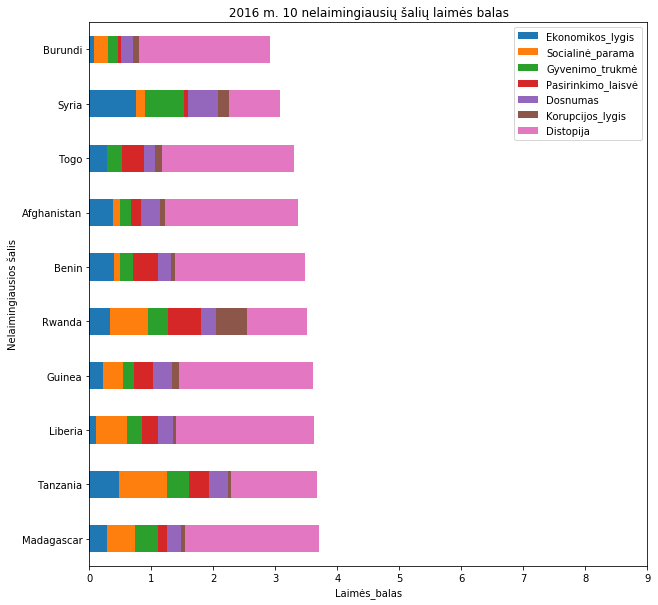

In [40]:
data2016.index = data2016['Šalis']
data2016[['Ekonomikos_lygis', 'Socialinė_parama','Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis', 'Distopija']].tail(10).plot(kind='barh',
                                                                xticks=np.arange(10), stacked=True, figsize= (10, 10))
plt.xlabel("Laimės_balas")
plt.xlabel("Laimės_balas")
plt.ylabel("Nelaimingiausios šalis")
plt.title(' 2016 m. 10 nelaimingiausių šalių laimės balas ')

In [41]:
data2017.sort_values(by="Laimės_reitingas", ascending=True).tail(10) 

,Šalis,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Dosnumas,Korupcijos_lygis,Distopija,Regionas
Šalis,,,,,,,,,,,
Yemen,Yemen,145,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,Asia-Pacific
South Sudan,South Sudan,146,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,Africa
Liberia,Liberia,147,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,Africa
Guinea,Guinea,148,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,Africa
Togo,Togo,149,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,Africa
Rwanda,Rwanda,150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,Africa
Syria,Syria,151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,Asia-Pacific
Tanzania,Tanzania,152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,Africa
Burundi,Burundi,153,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Africa


Text(0.5, 1.0, ' 2017 m. 10 nelaimingiausių šalių laimės balas ')

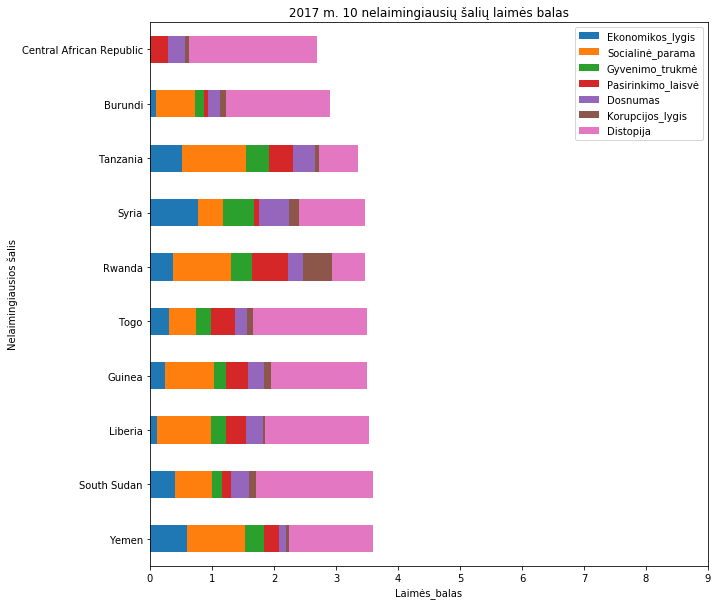

In [42]:
data2017.index = data2017['Šalis']
data2017[['Ekonomikos_lygis', 'Socialinė_parama','Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis', 'Distopija']].tail(10).plot(kind='barh',
                                                                xticks=np.arange(10), stacked=True, figsize= (10, 10))
plt.xlabel("Laimės_balas")
plt.ylabel("Nelaimingiausios šalis")
plt.title(' 2017 m. 10 nelaimingiausių šalių laimės balas ')

In [43]:
data2018.sort_values(by="Laimės_reitingas", ascending=True).tail(10) 

,Šalis,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Dosnumas,Korupcijos_lygis,Distopija,Regionas
Šalis,,,,,,,,,,,
Malawi,Malawi,147,3.587,0.186,0.541,0.306,0.531,0.210,0.080,1.813,Africa
Haiti,Haiti,148,3.582,0.315,0.714,0.289,0.025,0.392,0.104,1.847,Latin America
Liberia,Liberia,149,3.495,0.076,0.858,0.267,0.419,0.206,0.030,1.669,Africa
Syria,Syria,150,3.462,0.689,0.382,0.539,0.088,0.376,0.144,1.388,Asia-Pacific
Rwanda,Rwanda,151,3.408,0.332,0.896,0.400,0.636,0.200,0.444,0.944,Africa
Yemen,Yemen,152,3.355,0.442,1.073,0.343,0.244,0.083,0.064,1.170,Asia-Pacific
Tanzania,Tanzania,153,3.303,0.455,0.991,0.381,0.481,0.270,0.097,0.725,Africa
South Sudan,South Sudan,154,3.254,0.337,0.608,0.177,0.112,0.224,0.106,1.796,Africa
Central African Republic,Central African Republic,155,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2.526,Africa


Text(0.5, 1.0, ' 2018 m. 5 nelaimingiausių šalių laimės balas ')

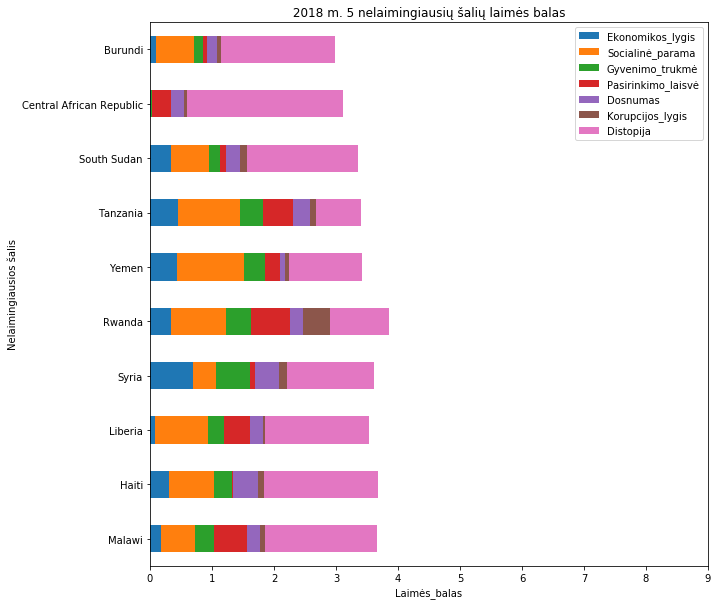

In [44]:
data2018.index = data2018['Šalis']
data2018[['Ekonomikos_lygis', 'Socialinė_parama','Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis', 'Distopija']].tail(10).plot(kind='barh',
                                                                xticks=np.arange(10), stacked=True, figsize= (10, 10))
plt.xlabel("Laimės_balas")
plt.ylabel("Nelaimingiausios šalis")
plt.title(' 2018 m. 5 nelaimingiausių šalių laimės balas ')

# *<font color='#0fb9f5'>Laimės balo analizė pagal regionus</font>*

In [45]:
data_regionas2015 = data2015.groupby('Regionas')
data_regionas2016 = data2016.groupby('Regionas')
data_regionas2017 = data2017.groupby('Regionas')
data_regionas2018 = data2018.groupby('Regionas')

In [46]:
data2015.Regionas.value_counts()

Africa                        60
Central and Eastern Europe    29
Latin America                 22
Asia-Pacific                  22
Western Europe                21
Australia and New Zealand      2
North America                  2
Name: Regionas, dtype: int64

C:\Users\Boys\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 6.79999999999999, 'šalių kiekis')

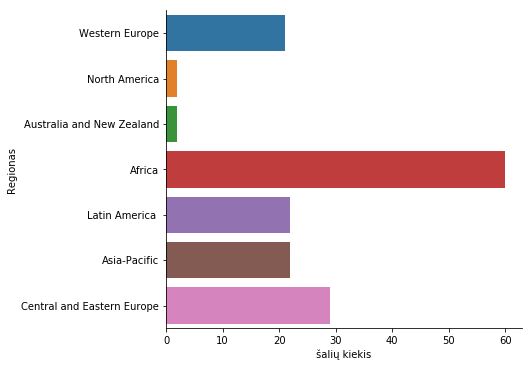

In [47]:
sns.catplot(y="Regionas", kind="count", data=data2015, size = 5, aspect = 1.5)
plt.xlabel('šalių kiekis')

In [48]:
data_regionas2015['Laimės_balas'].describe().sort_values(by = 'mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Regionas,,,,,,,,
Australia and New Zealand,2.0,7.285000,0.001414,7.284,7.28450,7.2850,7.2855,7.286
North America,2.0,7.273000,0.217789,7.119,7.19600,7.2730,7.3500,7.427
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.9370,7.3780,7.587
Latin America,22.0,6.144682,0.728560,4.518,5.84050,6.1490,6.6460,7.226
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.2860,5.8130,6.505
Asia-Pacific,22.0,5.167273,0.833290,3.575,4.59725,5.1670,5.6960,6.798
Africa,60.0,4.620833,1.013176,2.839,3.92425,4.5145,5.0240,7.278


In [49]:
data2016.Regionas.value_counts()

Africa                        57
Central and Eastern Europe    29
Latin America                 24
Asia-Pacific                  22
Western Europe                21
Australia and New Zealand      2
North America                  2
Name: Regionas, dtype: int64

C:\Users\Boys\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 6.79999999999999, 'šalių kiekis')

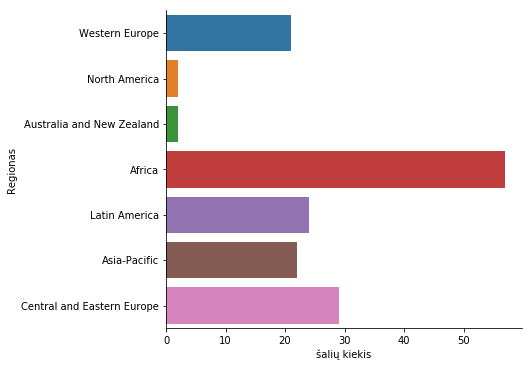

In [50]:
sns.catplot(y="Regionas", kind="count", data=data2016, size = 5, aspect = 1.5)
plt.xlabel('šalių kiekis')

In [51]:
data_regionas2016['Laimės_balas'].describe().sort_values(by = 'mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Regionas,,,,,,,,
Australia and New Zealand,2.0,7.323500,0.014849,7.313,7.31825,7.3235,7.32875,7.334
North America,2.0,7.254000,0.212132,7.104,7.17900,7.2540,7.32900,7.404
Western Europe,21.0,6.685667,0.789190,5.033,6.36100,6.9070,7.33900,7.526
Latin America,24.0,6.101750,0.725680,4.028,5.80225,6.1260,6.66275,7.087
Central and Eastern Europe,29.0,5.370690,0.590395,4.217,5.14500,5.4880,5.81300,6.596
Asia-Pacific,22.0,5.169909,0.835710,3.360,4.68050,5.1640,5.74075,6.739
Africa,57.0,4.552965,0.958539,2.905,3.85600,4.2760,5.05700,7.267


In [52]:
data2017.Regionas.value_counts()

Africa                        44
Asia-Pacific                  42
Latin America                 22
Central and Eastern Europe    22
Western Europe                20
Australia and New Zealand      2
North America                  2
Name: Regionas, dtype: int64

C:\Users\Boys\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 6.79999999999999, 'šalių kiekis')

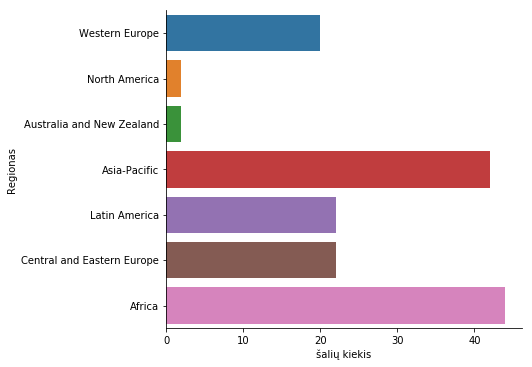

In [53]:
sns.catplot(y="Regionas", kind="count", data=data2017, size = 5, aspect = 1.5)
plt.xlabel('šalių kiekis')

In [54]:
data_regionas2017['Laimės_balas'].describe().sort_values(by = 'mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Regionas,,,,,,,,
Australia and New Zealand,2.0,7.299000,0.021213,7.284,7.29150,7.2990,7.30650,7.314
North America,2.0,7.154500,0.228395,6.993,7.07375,7.1545,7.23525,7.316
Western Europe,20.0,6.741250,0.861057,4.096,6.50575,6.9210,7.40000,7.537
Latin America,22.0,5.957818,0.750925,3.603,5.54850,6.0395,6.45400,7.079
Central and Eastern Europe,22.0,5.513091,0.397909,4.644,5.24750,5.5900,5.83475,6.098
Asia-Pacific,42.0,5.257643,0.862102,3.462,4.62900,5.2480,5.89950,7.213
Africa,44.0,4.239500,0.681866,2.693,3.78775,4.1850,4.60425,5.872


In [55]:
data2018.Regionas.value_counts()

Africa                        44
Asia-Pacific                  44
Latin America                 22
Central and Eastern Europe    22
Western Europe                20
Australia and New Zealand      2
North America                  2
Name: Regionas, dtype: int64

C:\Users\Boys\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 6.79999999999999, 'šalių kiekis')

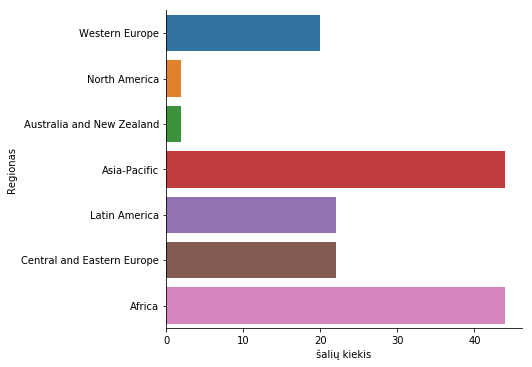

In [56]:
sns.catplot(y="Regionas", kind="count", data=data2018, size = 5, aspect = 1.5)
plt.xlabel('šalių kiekis')

In [57]:
data_regionas2018['Laimės_balas'].describe().sort_values(by = 'mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
Regionas,,,,,,,,
Australia and New Zealand,2.0,7.298000,0.036770,7.272,7.28500,7.2980,7.31100,7.324
North America,2.0,7.107000,0.312541,6.886,6.99650,7.1070,7.21750,7.328
Western Europe,20.0,6.795000,0.856699,4.103,6.59250,6.9460,7.45250,7.632
Latin America,22.0,5.950136,0.717442,3.582,5.69875,6.1540,6.38650,7.072
Central and Eastern Europe,22.0,5.585545,0.399105,4.586,5.34975,5.6510,5.90850,6.173
Asia-Pacific,44.0,5.259455,0.882009,3.355,4.59225,5.2000,5.95425,7.190
Africa,44.0,4.289364,0.650387,2.905,3.80475,4.3665,4.63750,5.891


# *<font color='#0fb9f5'>Laimės balo pokyčiai pagal metus ir regionus</font>*

In [58]:
data= pd.read_excel('data\\World Happiness Reportbendras.xlsx', sep=';')

In [59]:
data.pivot_table('Laimės_balas', index='Regionas', columns='Metai', aggfunc='mean')

Metai,2015,2016,2017,2018
Regionas,,,,
Africa,4.620833,4.552965,4.239500,4.289364
Asia-Pacific,5.167273,5.169909,5.257643,5.259455
Australia and New Zealand,7.285000,7.323500,7.299000,7.298000
Central and Eastern Europe,5.332931,5.370690,5.513091,5.585545
Latin America,6.144682,6.101750,5.957818,5.950136
North America,7.273000,7.254000,7.154500,7.107000
Western Europe,6.689619,6.685667,6.741250,6.795000


In [60]:
data = data.drop(columns=['Laimės_reitingas', 'Laimės_balas', 'Distopija'])

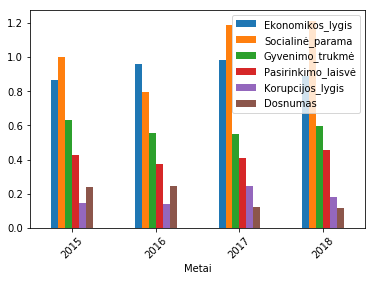

In [61]:
data.groupby('Metai').mean().plot(kind='bar', rot=45) 

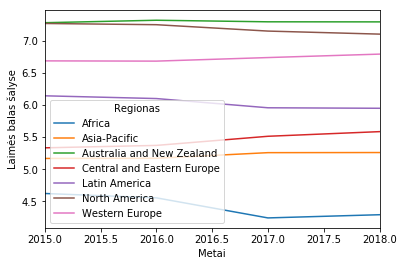

In [62]:
data= pd.read_excel('data\\World Happiness Reportbendras.xlsx', sep=';')
data.pivot_table('Laimės_balas', index='Metai', columns='Regionas', aggfunc='mean').plot()

plt.ylabel('Laimės balas šalyse');

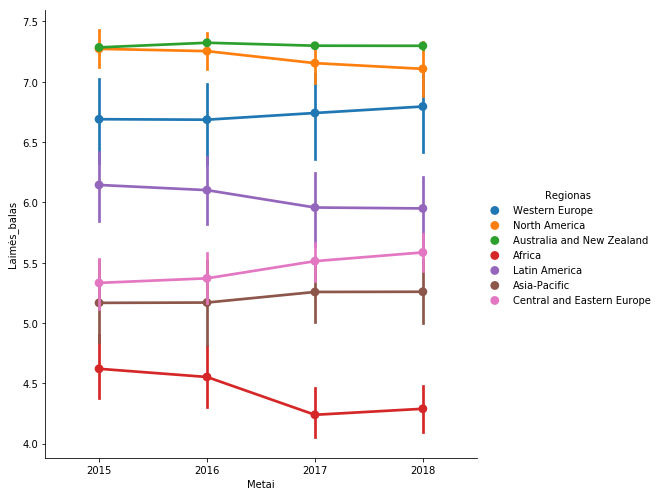

In [63]:
sns.catplot(x="Metai",
            y="Laimės_balas", 
            hue="Regionas", 
            data=data, 
            kind='point', height=7, aspect=1)

# *<font color='#75ba4a'>TABLEO DASHBOARD "LB vidurkiai"</font>* 

# *<font color='#0fb9f5'>Baltijos šalių laimės balų analizė</font>*

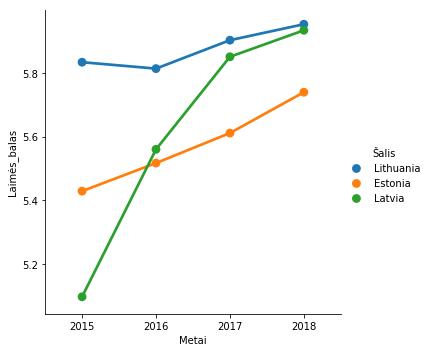

In [64]:
sns.catplot(x="Metai",
            y="Laimės_balas", 
            hue="Šalis", 
            data=data_b, 
            kind="point");

In [65]:
data_b = pd.read_excel('data\\baltijos.xlsx', sep=';')

In [66]:
data_b.pivot_table('Laimės_balas', index='Metai', columns='Šalis', aggfunc='mean')

Šalis,Estonia,Latvia,Lithuania
Metai,,,
2015,5.429,5.098,5.833
2016,5.517,5.560,5.813
2017,5.611,5.850,5.902
2018,5.739,5.933,5.952


In [67]:
data_b.describe()

,Metai,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Korupcijos_lygis,Dosnumas,Distopija
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2016.500000,62.750000,5.686417,1.272568,1.292906,0.690265,0.345703,0.081991,0.090780,1.986813
std,1.167748,11.505927,0.253649,0.215042,0.210883,0.046731,0.112034,0.059453,0.070284,0.383041
min,2015.000000,50.000000,5.098000,1.113120,0.950250,0.628950,0.189290,0.010165,0.006000,1.357509
25%,2015.750000,53.000000,5.549250,1.150805,1.087743,0.644935,0.268528,0.024050,0.024870,1.628788
50%,2016.500000,61.500000,5.776000,1.208940,1.331082,0.688074,0.337854,0.087450,0.079036,2.064828
75%,2017.250000,69.000000,5.863000,1.288376,1.474305,0.726097,0.423552,0.112128,0.174113,2.213553
max,2018.000000,89.000000,5.952000,1.920000,1.532000,0.773610,0.553000,0.185190,0.183249,2.605250


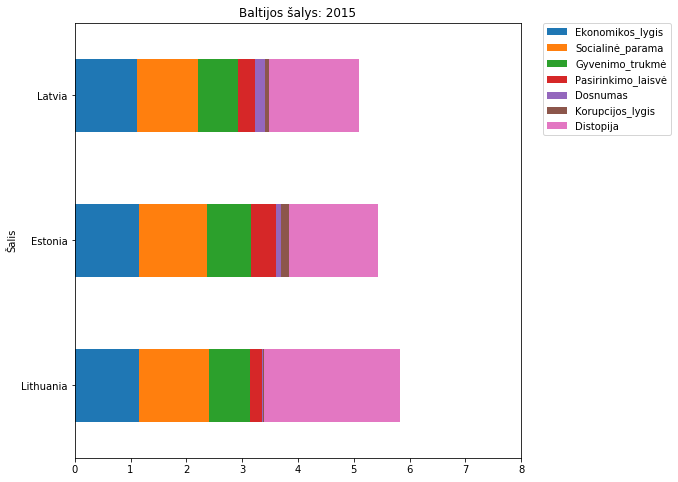

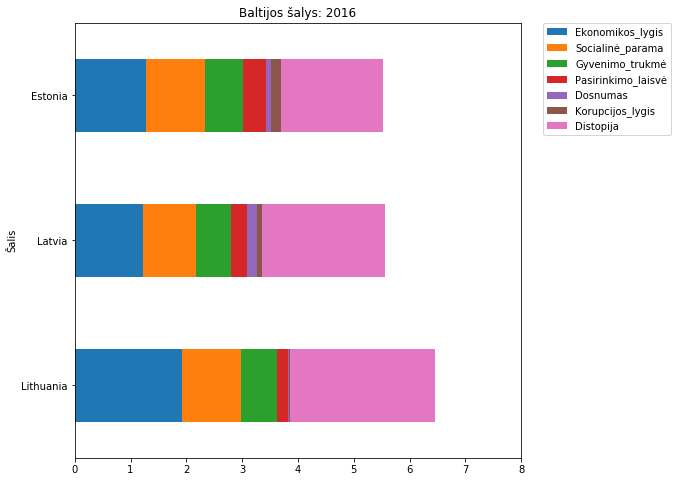

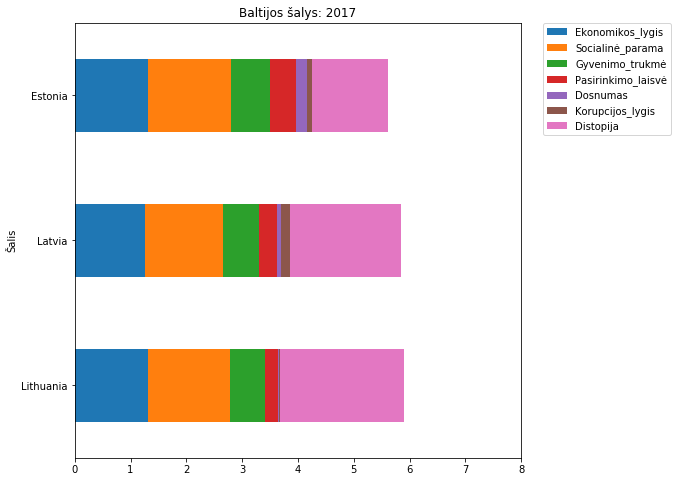

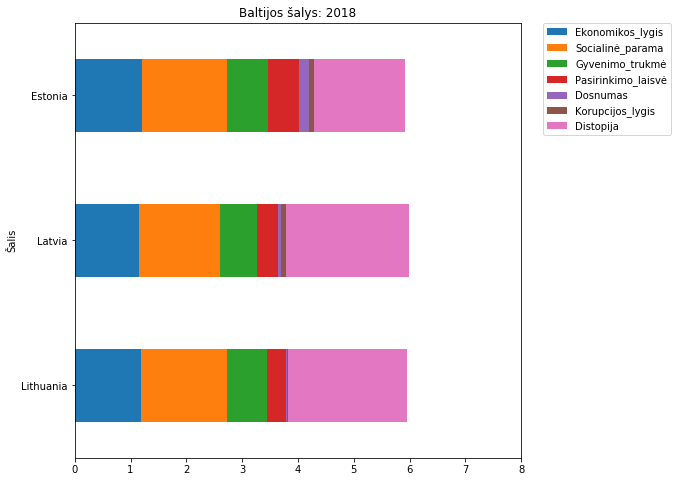

In [68]:
data_b.index = data_b['Šalis']
years = [2015, 2016, 2017, 2018]

for year in years:
    
    df = data_b[data_b['Metai'] == year]

    df[['Ekonomikos_lygis', 'Socialinė_parama','Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis', 'Distopija']].plot(
        kind='barh', xticks=np.arange(9), stacked=True, figsize= (8,8))

    plt.title('Baltijos šalys: ' + str(year))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# *<font color='#75ba4a'>TABLEO DASHBOARD "Baltijos šalys"</font>* 

## *<font color='#011efe'>5. Koreliacija</font>*<a id='Koreliacija'></a>

C:\Users\Boys\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Laimės balo sklaida palyginti su kitais kintamaisiais')

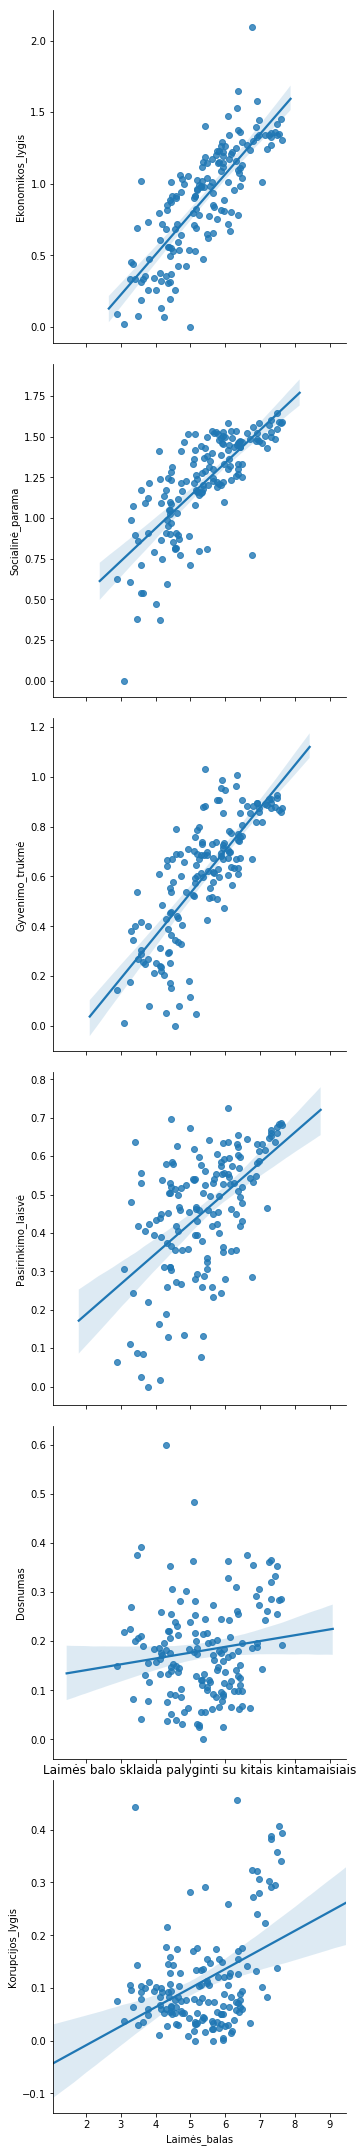

In [69]:
sns.pairplot(data=data2018, kind='reg', size = 5,
                  x_vars=['Laimės_balas'],
                  y_vars=['Ekonomikos_lygis', 'Socialinė_parama','Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis'])
plt.title('Laimės balo sklaida palyginti su kitais kintamaisiais') 

In [70]:
data2018.corr(method="spearman", min_periods=20)["Laimės_balas"].sort_values(ascending=False)

Laimės_balas          1.000000
Ekonomikos_lygis      0.821207
Gyvenimo_trukmė       0.791847
Socialinė_parama      0.775751
Distopija             0.551213
Pasirinkimo_laisvė    0.534761
Korupcijos_lygis      0.263250
Dosnumas              0.110478
Laimės_reitingas     -0.999998
Name: Laimės_balas, dtype: float64

In [71]:
data2018.corr(method="pearson", min_periods=20)["Laimės_balas"].sort_values(ascending=False)

Laimės_balas          1.000000
Ekonomikos_lygis      0.800976
Gyvenimo_trukmė       0.775122
Socialinė_parama      0.745760
Distopija             0.545375
Pasirinkimo_laisvė    0.544280
Korupcijos_lygis      0.414598
Dosnumas              0.134519
Laimės_reitingas     -0.991749
Name: Laimės_balas, dtype: float64

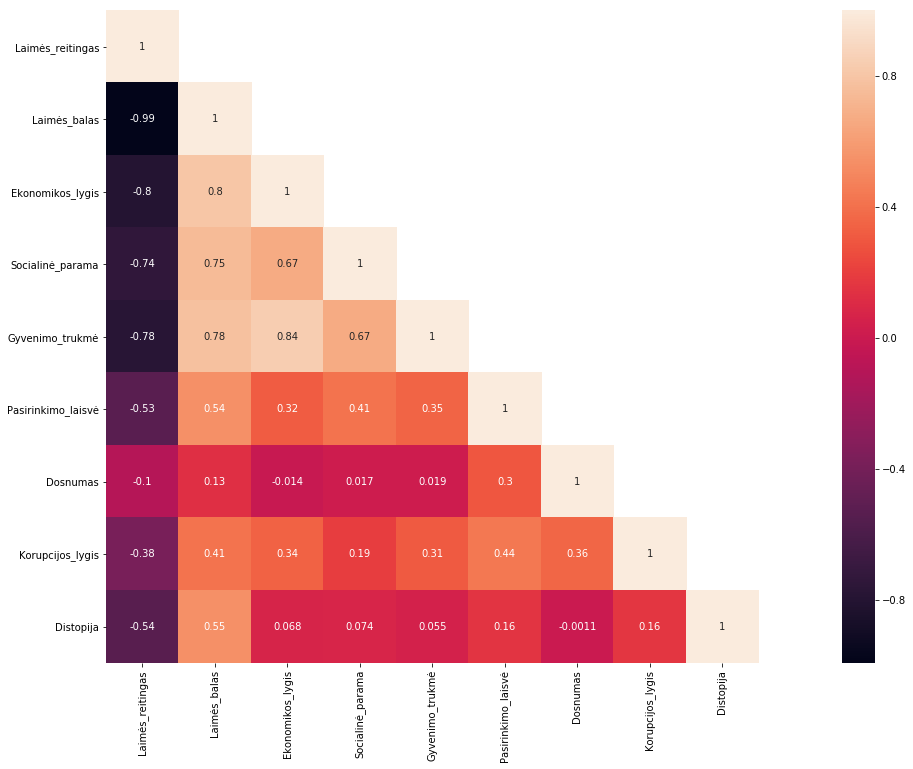

In [72]:
cor_mat= data2018[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [73]:
corr = data2018.corr(method='spearman') 
corr.style.background_gradient(cmap='coolwarm')

,Laimės_reitingas,Laimės_balas,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Dosnumas,Korupcijos_lygis,Distopija
Laimės_reitingas,1,-0.999998,-0.821319,-0.775802,-0.791971,-0.534637,-0.110306,-0.263156,-0.551151
Laimės_balas,-0.999998,1,0.821207,0.775751,0.791847,0.534761,0.110478,0.26325,0.551213
Ekonomikos_lygis,-0.821319,0.821207,1,0.715398,0.862616,0.359212,-0.01077,0.241916,0.122108
Socialinė_parama,-0.775802,0.775751,0.715398,1,0.674383,0.451799,0.0431615,0.131721,0.180533
Gyvenimo_trukmė,-0.791971,0.791847,0.862616,0.674383,1,0.360031,0.0158816,0.201189,0.122
Pasirinkimo_laisvė,-0.534637,0.534761,0.359212,0.451799,0.360031,1,0.34654,0.441858,0.177502
Dosnumas,-0.110306,0.110478,-0.01077,0.0431615,0.0158816,0.34654,1,0.291318,0.0870058
Korupcijos_lygis,-0.263156,0.26325,0.241916,0.131721,0.201189,0.441858,0.291318,1,0.145247
Distopija,-0.551151,0.551213,0.122108,0.180533,0.122,0.177502,0.0870058,0.145247,1


## *<font color='#011efe'>6. Modelio taikymas</font>*<a id='taikymas'></a>

In [74]:
data = data2018
data = data2018.dropna()

In [75]:
# Sukurymas X ir y skirtus atitinkamai paaiškinamiesiems kintamiesiems ir kintamajam, kurį norime prognozuoti:

X = data[['Ekonomikos_lygis','Socialinė_parama', 'Gyvenimo_trukmė', 'Pasirinkimo_laisvė', 'Dosnumas', 'Korupcijos_lygis']]
y = data['Laimės_balas'].values.ravel()

In [76]:
X.head()

,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Dosnumas,Korupcijos_lygis
Šalis,,,,,,
Finland,1.305,1.592,0.874,0.681,0.192,0.393
Norway,1.456,1.582,0.861,0.686,0.286,0.340
Denmark,1.351,1.590,0.868,0.683,0.284,0.408
Iceland,1.343,1.644,0.914,0.677,0.353,0.138
Switzerland,1.420,1.549,0.927,0.660,0.256,0.357


In [77]:
print(y[:5])

[7.632 7.594 7.555 7.495 7.487]


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# Padalinkime įmtį į treniruojamą imtį, kurios pagrindu kursime modelius, 
# ir testuojama imtį, kurios pagrindu tikrinsime modelius ir pasirinksime geriausią modelį:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

X_test = X_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

In [80]:
X_train.head()

,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Dosnumas,Korupcijos_lygis
0,1.017,1.174,0.417,0.557,0.042,0.092
1,1.420,1.549,0.927,0.660,0.256,0.357
2,1.143,1.516,0.631,0.454,0.148,0.121
3,0.816,0.990,0.666,0.260,0.077,0.028
4,0.781,1.268,0.608,0.604,0.179,0.071


In [81]:
X_test.head()

,Ekonomikos_lygis,Socialinė_parama,Gyvenimo_trukmė,Pasirinkimo_laisvė,Dosnumas,Korupcijos_lygis
0,0.689,1.172,0.048,0.462,0.201,0.032
1,0.793,1.413,0.609,0.163,0.187,0.011
2,0.131,0.867,0.221,0.390,0.175,0.099
3,1.131,1.331,0.808,0.431,0.197,0.061
4,0.259,0.474,0.253,0.434,0.158,0.101


In [82]:
print(y_train[:5])

[3.59  7.487 5.79  4.321 6.382]


In [83]:
print(y_test[:5])

[5.155 4.103 4.166 6.476 3.999]


In [84]:
# Importuojame modelius:

from sklearn.dummy import DummyRegressor # Naivusis klasifikacijos modelis
from sklearn.neighbors import KNeighborsRegressor # KNN
from sklearn.tree import DecisionTreeRegressor # Klasifikacijos medis
from sklearn.ensemble import RandomForestRegressor # Atsitiktinis klasifikacijų miškas
from sklearn.linear_model import LinearRegression # Logistinė regresija

In [85]:
# Sukuriame modelius, naudodami treniruojamą imtį:

Naivus_modelis = DummyRegressor(strategy='mean').fit(X_train, y_train)

KNN_modelis = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

Regresijos_medzio_modelis = DecisionTreeRegressor(random_state=123).fit(X_train, y_train)

Regresijos_atsitiktinio_misko_modelis = RandomForestRegressor(random_state=123).fit(X_train,y_train)

TiesinesRegresijos_modelis = LinearRegression().fit(X_train, y_train)

C:\Users\Boys\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [86]:
# Atliekame prognozes testuojamai imčiai:

Naivaus_modelio_prognoze = Naivus_modelis.predict(X_test)

KNN_modelio_prognoze = KNN_modelis.predict(X_test)

Regresijos_medzio_modelio_prognoze  = Regresijos_medzio_modelis.predict(X_test)

Regresijos_atsitiktinio_misko_prognoze = Regresijos_atsitiktinio_misko_modelis.predict(X_test)

TiesinesRegresijos_modelis_prognoze = TiesinesRegresijos_modelis.predict(X_test)

In [87]:
print(Naivaus_modelio_prognoze[:5])

[5.42030645 5.42030645 5.42030645 5.42030645 5.42030645]


In [88]:
# matuosime, kiek gerai sutampa modelio prognoze su tikromis testuojamos imties modeliuojamo proceso reikšmėmis, 
# naudodami mean_squared_error metrika:
#    mean_squared_error = square_root(mean((y_tikras - y_prognozuotas)**2))
# Kuo mažesne reikšmė, tuo mažesnį paklaida, tuo geresnis modelis.

from sklearn.metrics import mean_squared_error 

In [89]:
zodynas = {'modelis':['Naivus_modelis', 
                     'KNN_modelis', 
                     'Regresijos_medzio_modelis',
                     'Regresijos_atsitiktinio_misko_modelis',
                     'TiesinesRegresijos_modelis'],
          'mean_squared_error':[mean_squared_error(y_test, Naivaus_modelio_prognoze), 
                      mean_squared_error(y_test, KNN_modelio_prognoze),
                      mean_squared_error(y_test, Regresijos_medzio_modelio_prognoze), 
                      mean_squared_error(y_test, Regresijos_atsitiktinio_misko_prognoze),
                      mean_squared_error(y_test, TiesinesRegresijos_modelis_prognoze)]}

modeliu_tinkamumas = pd.DataFrame(zodynas)

modeliu_tinkamumas.sort_values(by='mean_squared_error', ascending=True)

,modelis,mean_squared_error
3,Regresijos_atsitiktinio_misko_modelis,0.205236
1,KNN_modelis,0.232794
4,TiesinesRegresijos_modelis,0.300522
2,Regresijos_medzio_modelis,0.302980
0,Naivus_modelis,1.284155


### **Sukuriame galutinį modelį ir jį išsaugome**

In [90]:
X_full = X.copy()

In [91]:
galutinis_modelis = RandomForestRegressor(random_state=123).fit(X_full,y)

C:\Users\Boys\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [92]:
import pickle

failo_vieta = 'galutinis_modelis.sav'
pickle.dump(galutinis_modelis, open(failo_vieta, 'wb'))

In [93]:
galutinis_modelis = pickle.load(open(failo_vieta, 'rb'))

In [94]:
print(galutinis_modelis.predict(X_full))

[7.4717 7.566  7.5359 7.4259 7.3408 7.3482 7.36   7.303  7.3667 7.332
 6.8223 7.1216 6.8538 7.1075 6.9729 6.9104 7.1026 6.886  6.8329 6.1654
 6.3056 7.07   6.5458 6.3562 6.3805 6.2994 6.346  6.0111 6.1829 6.0259
 6.5235 6.7321 6.2153 6.3931 6.3154 6.3385 5.8529 6.1089 6.0524 5.6271
 5.8201 6.0801 6.0866 5.7545 6.1162 5.8587 6.1626 5.877  5.5428 5.6969
 6.3046 5.8426 5.8199 6.2626 5.9621 5.831  5.871  5.9825 5.6962 5.8834
 5.7664 5.5712 5.7655 5.6431 5.663  5.5031 5.4469 5.5052 5.619  5.6168
 5.3307 5.3659 5.5028 5.6345 5.3212 5.9055 5.8436 5.3274 5.9688 5.2285
 5.3275 5.4737 5.402  5.284  4.8965 5.7708 5.2449 5.2048 5.2518 5.5567
 4.6688 5.2365 4.8866 5.4667 5.7356 5.1172 5.3564 4.4839 4.9432 5.2449
 4.9263 5.0332 4.5117 4.7466 4.4039 5.1944 4.5579 4.6641 4.5326 4.6266
 4.5649 4.5595 4.2528 4.2778 4.781  4.9898 4.4129 4.2814 4.3106 4.8074
 4.1555 4.426  4.2997 4.3395 4.2967 4.356  3.8667 4.507  4.3752 4.3931
 4.0799 4.121  4.7083 4.0984 4.0367 4.0837 4.0676 4.2785 3.9092 4.012
 4.258  

## *<font color='#011efe'>7. Išvados</font>*<a id='Išvados'></a>